In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import pycountry
import seaborn as sns
import numpy as np

In [2]:
paths = glob.glob("data/*joint*")
print(paths)
df_master = pd.read_sas(paths[0])


['data/EVS_WVS_CrossNat_W7_joint_v1_4.sas7bdat']


In [3]:
df = df_master.copy()

df["B_COUNTRY_ALPHA"] = df[["B_COUNTRY_ALPHA"]].applymap(lambda x: x.decode("UTF-8"))
df = df.rename(columns = {"B_COUNTRY_ALPHA":"COUNTRY_CODE"})

df = df.drop(df.columns[:3], axis = 1)
df = df.drop(df.columns[1:20], axis = 1)
df = df.iloc[1:-1]

In [4]:
df

,COUNTRY_CODE,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
1,ALB,1.0,1.0,4.0,4.0,1.0,1.0,1.0,2.0,2.0,...,80.098794,5.33,7.5767,1.471,-0.444,0.157,-0.622,0.475,0.79,0.446
2,ALB,1.0,2.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,...,75.400315,5.33,7.5767,1.471,-0.444,0.157,-0.622,0.475,0.79,0.446
3,ALB,1.0,2.0,2.0,4.0,1.0,2.0,1.0,2.0,1.0,...,75.400315,5.33,7.5767,1.471,-0.444,0.157,-0.622,0.475,0.79,0.446
4,ALB,1.0,1.0,2.0,4.0,1.0,3.0,1.0,2.0,2.0,...,80.098794,5.33,7.5767,1.471,-0.444,0.157,-0.622,0.475,0.79,0.446
5,ALB,1.0,3.0,3.0,4.0,1.0,2.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124848,USA,1.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124849,USA,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124850,USA,1.0,1.0,2.0,3.0,2.0,3.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124851,USA,1.0,1.0,2.0,4.0,3.0,3.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
def alpha_to_name(alpha):
    return pycountry.countries.get(alpha_3 = alpha).name

In [6]:
df.columns

Index(['COUNTRY_CODE', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       ...
       'WVS_Polmistrust_PartyVoter', 'WVS_LR_MedianVoter',
       'WVS_LibCon_MedianVoter', 'v2psbars', 'v2psorgs', 'v2psprbrch',
       'v2psprlnks', 'v2psplats', 'v2xnp_client', 'v2xps_party'],
      dtype='object', length=371)

In [7]:
Q_columns = df.columns[1:183] #Raw question columns
D_columns = df.columns[184:220] #Derived data columns


In [8]:
df_D = df[D_columns].copy()
df_D['COUNTRY_CODE'] = pd.Series(df['COUNTRY_CODE'])

df_Q = df[Q_columns].copy()

In [9]:
for col in df_D.columns:
    d = df_D[col]
    nancount = len(d) - d.count()
    shittiness = nancount/d.count()
    print(f"{col}: nan rate = {shittiness:.3f}")

Y002: nan rate = 0.052
Y003: nan rate = 0.023
SACSECVAL: nan rate = 0.008
RESEMAVAL: nan rate = 0.015
I_AUTHORITY: nan rate = 0.047
I_NATIONALISM: nan rate = 0.042
I_DEVOUT: nan rate = 0.030
DEFIANCE: nan rate = 0.011
I_RELIGIMP: nan rate = 0.011
I_RELIGBEL: nan rate = 0.032
I_RELIGPRAC: nan rate = 0.010
DISBELIEF: nan rate = 0.006
I_NORM1: nan rate = 0.032
I_NORM2: nan rate = 0.013
I_NORM3: nan rate = 0.011
RELATIVISM: nan rate = 0.009
I_TRUSTARMY: nan rate = 0.057
I_TRUSTPOLICE: nan rate = 0.023
I_TRUSTCOURTS: nan rate = 0.041
SCEPTICISM: nan rate = 0.023
I_INDEP: nan rate = 0.013
I_IMAGIN: nan rate = 0.017
I_NONOBED: nan rate = 0.017
AUTONOMY: nan rate = 0.016
I_WOMJOB: nan rate = 0.009
I_WOMPOL: nan rate = 0.033
I_WOMEDU: nan rate = 0.018
EQUALITY: nan rate = 0.011
I_HOMOLIB: nan rate = 0.062
I_ABORTLIB: nan rate = 0.027
I_DIVORLIB: nan rate = 0.021
CHOICE: nan rate = 0.021
I_VOICE1: nan rate = 0.044
I_VOICE2: nan rate = 0.054
I_VOI2_00: nan rate = 0.068
VOICE: nan rate = 0.031
COU

In [13]:
df_R = df[['COUNTRY_CODE',"SACSECVAL","RESEMAVAL","DEFIANCE", "DISBELIEF","RELATIVISM","SCEPTICISM","AUTONOMY","EQUALITY","CHOICE","VOICE"]].dropna()

# Idea:
### 1: Linear SVM 2 countries, get the resulting normal vec. Then remove that component, do SVM again and get 2nd normal vec. Then plot the projections.

### 2: Use an SVM to get most useful components for separation. l1 norm. Reduce DS to just those questions. 

In [14]:
df_D

,Y002,Y003,SACSECVAL,RESEMAVAL,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,...,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,COUNTRY_CODE
1,2.0,1.0,0.235833,0.526944,0.0,0.00,0.00,0.000000,0.00,0.0,...,1.000000,0.444444,0.444444,0.444444,0.444444,0.66,0.0,0.330,0.330,ALB
2,1.0,1.0,0.125000,0.388889,0.0,0.00,0.00,0.000000,0.00,0.0,...,1.000000,0.000000,0.222222,0.444444,0.222222,0.00,0.0,0.000,0.000,ALB
3,2.0,-1.0,0.276667,0.406991,0.0,0.00,0.00,0.000000,0.33,0.0,...,0.833333,0.000000,0.444444,0.444444,0.296296,0.33,0.0,0.165,0.165,ALB
4,2.0,0.0,0.220833,0.330324,0.0,0.00,0.00,0.000000,0.66,0.0,...,0.526667,0.000000,0.444444,0.444444,0.296296,0.33,0.0,0.165,0.165,ALB
5,2.0,-1.0,0.402500,0.399630,0.0,0.00,0.00,0.000000,0.33,0.0,...,0.500000,0.000000,0.222222,0.333333,0.185185,0.66,0.5,0.580,0.580,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124848,2.0,1.0,0.610278,0.492639,0.5,0.00,0.00,0.166667,0.33,1.0,...,0.916667,0.555556,0.444444,0.666667,0.555556,0.33,0.0,0.165,0.165,USA
124849,2.0,-2.0,0.276667,0.455602,0.0,0.00,1.00,0.333333,0.00,0.0,...,0.916667,1.000000,0.444444,0.777778,0.740741,0.33,0.0,0.165,0.165,USA
124850,NaN,1.0,0.303333,0.831944,0.0,0.00,0.33,0.110000,0.66,0.0,...,0.720000,0.777778,0.777778,0.777778,0.777778,0.66,1.0,0.830,0.830,USA
124851,3.0,1.0,0.470833,0.923611,0.0,0.33,0.33,0.220000,0.66,1.0,...,0.916667,1.000000,0.888889,0.444444,0.777778,1.00,1.0,1.000,1.000,USA


In [15]:
df_D.columns

Index(['Y002', 'Y003', 'SACSECVAL', 'RESEMAVAL', 'I_AUTHORITY',
       'I_NATIONALISM', 'I_DEVOUT', 'DEFIANCE', 'I_RELIGIMP', 'I_RELIGBEL',
       'I_RELIGPRAC', 'DISBELIEF', 'I_NORM1', 'I_NORM2', 'I_NORM3',
       'RELATIVISM', 'I_TRUSTARMY', 'I_TRUSTPOLICE', 'I_TRUSTCOURTS',
       'SCEPTICISM', 'I_INDEP', 'I_IMAGIN', 'I_NONOBED', 'AUTONOMY',
       'I_WOMJOB', 'I_WOMPOL', 'I_WOMEDU', 'EQUALITY', 'I_HOMOLIB',
       'I_ABORTLIB', 'I_DIVORLIB', 'CHOICE', 'I_VOICE1', 'I_VOICE2',
       'I_VOI2_00', 'VOICE', 'COUNTRY_CODE'],
      dtype='object')

In [16]:
df_R #Reduced

,COUNTRY_CODE,SACSECVAL,RESEMAVAL,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE
1,ALB,0.235833,0.526944,0.000000,0.166667,0.666667,0.110000,0.333333,1.000000,0.444444,0.330
2,ALB,0.125000,0.388889,0.000000,0.166667,0.000000,0.333333,0.333333,1.000000,0.222222,0.000
3,ALB,0.276667,0.406991,0.000000,0.443333,0.000000,0.663333,0.333333,0.833333,0.296296,0.165
4,ALB,0.220833,0.330324,0.000000,0.553333,0.000000,0.330000,0.333333,0.526667,0.296296,0.165
5,ALB,0.402500,0.399630,0.000000,0.276667,0.333333,1.000000,0.333333,0.500000,0.185185,0.580
...,...,...,...,...,...,...,...,...,...,...,...
124848,USA,0.610278,0.492639,0.166667,0.721111,1.000000,0.553333,0.333333,0.916667,0.555556,0.165
124849,USA,0.276667,0.455602,0.333333,0.333333,0.000000,0.440000,0.000000,0.916667,0.740741,0.165
124850,USA,0.303333,0.831944,0.110000,0.553333,0.000000,0.550000,1.000000,0.720000,0.777778,0.830
124851,USA,0.470833,0.923611,0.220000,0.886667,0.666667,0.110000,1.000000,0.916667,0.777778,1.000


In [17]:
df_R["COUNTRY_CODE"].unique()

array(['ALB', 'AND', 'AZE', 'ARG', 'AUS', 'AUT', 'BGD', 'ARM', 'BOL',
       'BIH', 'BRA', 'BGR', 'MMR', 'BLR', 'CHL', 'CHN', 'TWN', 'COL',
       'HRV', 'CYP', 'CZE', 'DNK', 'ECU', 'ETH', 'EST', 'FIN', 'FRA',
       'GEO', 'DEU', 'GRC', 'HKG', 'HUN', 'ISL', 'IDN', 'IRN', 'IRQ',
       'ITA', 'JPN', 'KAZ', 'JOR', 'KOR', 'KGZ', 'LBN', 'LTU', 'MAC',
       'MYS', 'MEX', 'MNE', 'NLD', 'NZL', 'NIC', 'NGA', 'NOR', 'PAK',
       'PER', 'PHL', 'POL', 'PRI', 'ROU', 'RUS', 'SRB', 'SVK', 'VNM',
       'SVN', 'ZWE', 'ESP', 'SWE', 'CHE', 'TJK', 'THA', 'TUN', 'TUR',
       'MKD', 'GBR', 'USA'], dtype=object)

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [19]:
svc = SVC(C = 0.1)

X = df_R.drop(columns = ["COUNTRY_CODE"])
# Y = ohe.fit_transform(df_R[["COUNTRY_CODE"]])
Y = df_R["COUNTRY_CODE"]


# cross_val_score(svc, X, Y)

In [20]:
Y[:10000].unique()

array(['ALB', 'AND', 'AZE', 'ARG', 'AUS', 'AUT', 'BGD', 'ARM'],
      dtype=object)

In [21]:
df_R.drop(columns = ["COUNTRY_CODE"])

,SACSECVAL,RESEMAVAL,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE
1,0.235833,0.526944,0.000000,0.166667,0.666667,0.110000,0.333333,1.000000,0.444444,0.330
2,0.125000,0.388889,0.000000,0.166667,0.000000,0.333333,0.333333,1.000000,0.222222,0.000
3,0.276667,0.406991,0.000000,0.443333,0.000000,0.663333,0.333333,0.833333,0.296296,0.165
4,0.220833,0.330324,0.000000,0.553333,0.000000,0.330000,0.333333,0.526667,0.296296,0.165
5,0.402500,0.399630,0.000000,0.276667,0.333333,1.000000,0.333333,0.500000,0.185185,0.580
...,...,...,...,...,...,...,...,...,...,...
124848,0.610278,0.492639,0.166667,0.721111,1.000000,0.553333,0.333333,0.916667,0.555556,0.165
124849,0.276667,0.455602,0.333333,0.333333,0.000000,0.440000,0.000000,0.916667,0.740741,0.165
124850,0.303333,0.831944,0.110000,0.553333,0.000000,0.550000,1.000000,0.720000,0.777778,0.830
124851,0.470833,0.923611,0.220000,0.886667,0.666667,0.110000,1.000000,0.916667,0.777778,1.000


In [22]:
from sklearn.manifold import LocallyLinearEmbedding as LLE

In [23]:
from sklearn.manifold import TSNE

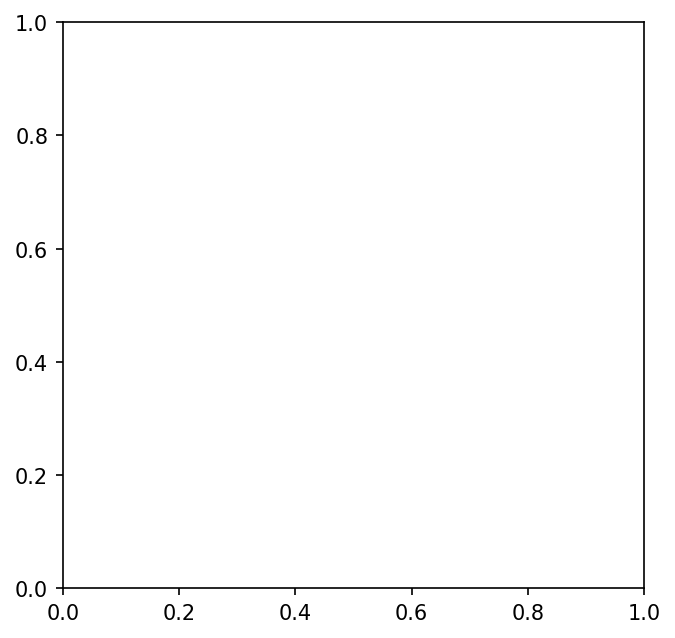

In [101]:
fig = plt.figure(figsize = (5,5), dpi = 150)
ax = fig.add_subplot(111)

lle = LLE(n_neighbors = 10)
tsne = TSNE()

X_lle = lle.fit_transform(X)
X_tsne = tsne.fit_transform(X)

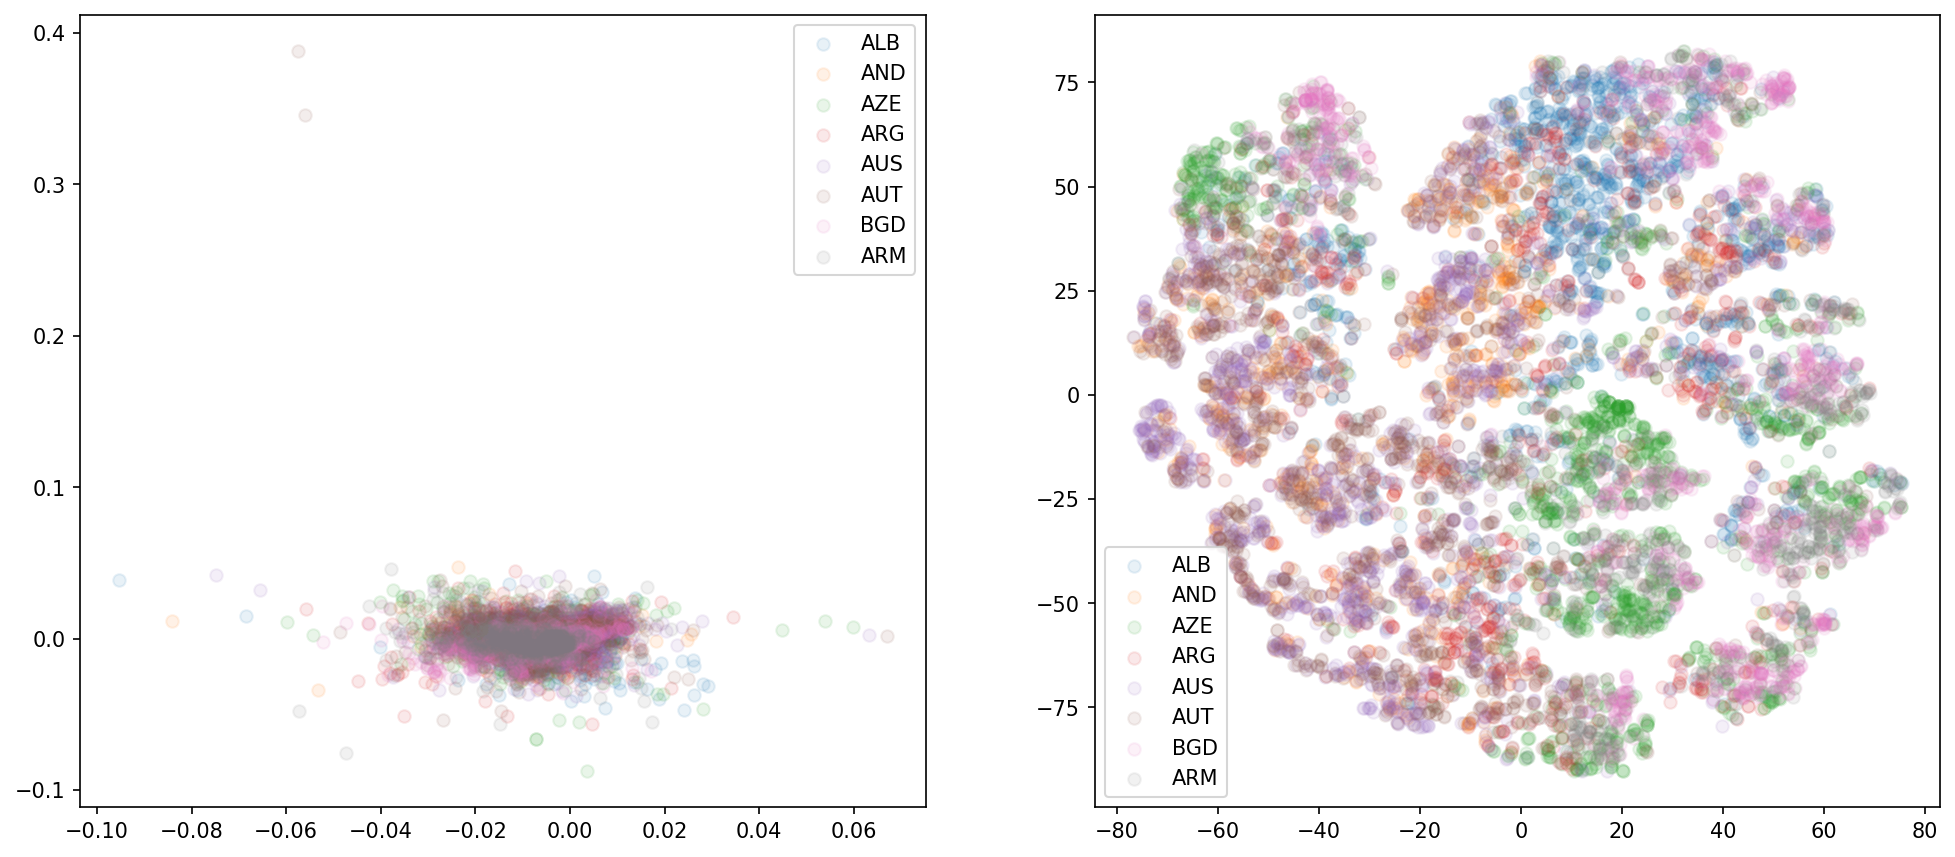

In [105]:
fig = plt.figure(figsize = (16,7), dpi = 150)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for country in Y.unique():
    d_lle = X_lle[Y == country]
    d_tsne = X_tsne[Y == country]
    
    ax1.scatter(d_lle[:,0],d_lle[:,1], label = country, alpha = 0.1)
    ax2.scatter(d_tsne[:,0],d_tsne[:,1], label = country, alpha = 0.1)

ax1.legend()
ax2.legend()

1        ALB
2        ALB
3        ALB
4        ALB
5        ALB
        ... 
10571    ARM
10572    ARM
10573    ARM
10574    ARM
10575    ARM
Name: COUNTRY_CODE, Length: 10000, dtype: object

In [110]:
USA_or_GBR = Y.isin(["GBR","USA"])

In [119]:
svc = SVC(C = 1)
cross_val_score(svc, X[USA_or_GBR], Y[USA_or_GBR])

array([0.71024735, 0.68160377, 0.64976415, 0.68042453, 0.5884434 ])

In [35]:
df_Q['COUNTRY_CODE'] = df['COUNTRY_CODE'].copy()

In [36]:
df_Q

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q277R,Q278,Q278R,Q279,Q280,Q284,Q288,Q288R,Q289,COUNTRY_CODE
1,1.0,1.0,4.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,0.0,1.0,3.0,3.0,NaN,1.0,1.0,5.0,ALB
2,1.0,2.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,0.0,1.0,4.0,4.0,NaN,4.0,2.0,5.0,ALB
3,1.0,2.0,2.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,...,2.0,3.0,2.0,5.0,7.0,NaN,1.0,1.0,5.0,ALB
4,1.0,1.0,2.0,4.0,1.0,3.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,7.0,7.0,NaN,NaN,NaN,5.0,ALB
5,1.0,3.0,3.0,4.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,7.0,5.0,2.0,2.0,1.0,5.0,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124848,1.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,NaN,NaN,7.0,NaN,1.0,9.0,3.0,0.0,USA
124849,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,4.0,2.0,1.0,USA
124850,1.0,1.0,2.0,3.0,2.0,3.0,2.0,1.0,1.0,2.0,...,1.0,0.0,1.0,7.0,NaN,NaN,4.0,2.0,NaN,USA
124851,1.0,1.0,2.0,4.0,3.0,3.0,2.0,1.0,1.0,2.0,...,2.0,3.0,2.0,1.0,NaN,2.0,5.0,2.0,0.0,USA


# NEW WICKED IDEA
Assume that people are separated by political opinion in clusters. And each country contains different proportions of people from these clusters. Do PCA on the questions to find "better" latent variables, then do k-means or GMM to find the clusters (expect like 30 or so, one for every political alignment). THEN do some Bayes shit to work out P(country | from cluster i).

In [37]:
to_drop = []

for col in df_Q.columns:
    d = df_Q[col].replace([-1,-2,-3,-4,-5], np.nan)
#     d = df_Q[col]
    nancount = len(d) - d.count()
    shittiness = nancount/len(d)
    drop = shittiness > 0.04
    if drop: to_drop.append(col)
    print(f"{col}: nan rate = {shittiness:.3f}, drop = {drop}")

Q1: nan rate = 0.003, drop = False
Q2: nan rate = 0.004, drop = False
Q3: nan rate = 0.006, drop = False
Q4: nan rate = 0.012, drop = False
Q5: nan rate = 0.011, drop = False
Q6: nan rate = 0.011, drop = False
Q7: nan rate = 0.006, drop = False
Q8: nan rate = 0.013, drop = False
Q9: nan rate = 0.010, drop = False
Q10: nan rate = 0.008, drop = False
Q11: nan rate = 0.017, drop = False
Q12: nan rate = 0.010, drop = False
Q13: nan rate = 0.015, drop = False
Q14: nan rate = 0.015, drop = False
Q15: nan rate = 0.016, drop = False
Q16: nan rate = 0.016, drop = False
Q17: nan rate = 0.017, drop = False
Q18: nan rate = 0.013, drop = False
Q19: nan rate = 0.022, drop = False
Q21: nan rate = 0.027, drop = False
Q22: nan rate = 0.041, drop = True
Q24: nan rate = 0.015, drop = False
Q27: nan rate = 0.029, drop = False
Q28: nan rate = 0.020, drop = False
Q29: nan rate = 0.032, drop = False
Q30: nan rate = 0.017, drop = False
Q31: nan rate = 0.027, drop = False
Q33: nan rate = 0.009, drop = False
Q3

In [38]:
df_Q

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q277R,Q278,Q278R,Q279,Q280,Q284,Q288,Q288R,Q289,COUNTRY_CODE
1,1.0,1.0,4.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0,...,1.0,0.0,1.0,3.0,3.0,NaN,1.0,1.0,5.0,ALB
2,1.0,2.0,2.0,4.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,0.0,1.0,4.0,4.0,NaN,4.0,2.0,5.0,ALB
3,1.0,2.0,2.0,4.0,1.0,2.0,1.0,2.0,1.0,1.0,...,2.0,3.0,2.0,5.0,7.0,NaN,1.0,1.0,5.0,ALB
4,1.0,1.0,2.0,4.0,1.0,3.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,7.0,7.0,NaN,NaN,NaN,5.0,ALB
5,1.0,3.0,3.0,4.0,1.0,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,7.0,5.0,2.0,2.0,1.0,5.0,ALB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124848,1.0,1.0,2.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,...,2.0,NaN,NaN,7.0,NaN,1.0,9.0,3.0,0.0,USA
124849,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,4.0,2.0,1.0,USA
124850,1.0,1.0,2.0,3.0,2.0,3.0,2.0,1.0,1.0,2.0,...,1.0,0.0,1.0,7.0,NaN,NaN,4.0,2.0,NaN,USA
124851,1.0,1.0,2.0,4.0,3.0,3.0,2.0,1.0,1.0,2.0,...,2.0,3.0,2.0,1.0,NaN,2.0,5.0,2.0,0.0,USA


In [39]:
# df_Q.drop(columns = to_drop).dropna()

In [40]:
questions_txt = np.loadtxt(r"data/questions.txt", delimiter='\n', dtype=str)

In [41]:
questions = {}
for line in questions_txt:
    if line[0] == "Q":
#         print(line)
        try:
            index = line.index(" ")
            if index:
                before = line[:index]
                after = line[index+1:]
                questions.update({before:after})
        except:
            pass
        
# questions

In [42]:
df_Q_filled = df_Q.drop(columns = to_drop).replace([-1,-2,-3,-4,-5], np.nan)

In [43]:
for col in df_Q_filled.columns:
    print(df_Q_filled[col].value_counts())

1.0    111817
2.0     11248
3.0      1148
4.0       284
Name: Q1, dtype: int64
1.0    56296
2.0    54275
3.0    11931
4.0     1858
Name: Q2, dtype: int64
2.0    55705
1.0    50409
3.0    15108
4.0     2840
Name: Q3, dtype: int64
3.0    43222
2.0    38400
4.0    25737
1.0    16025
Name: Q4, dtype: int64
1.0    73149
2.0    38181
3.0     8039
4.0     4107
Name: Q5, dtype: int64
1.0    46798
2.0    30783
3.0    27490
4.0    18460
Name: Q6, dtype: int64
1.0    94883
2.0    29171
Name: Q7, dtype: int64
2.0    64224
1.0    59067
Name: Q8, dtype: int64
1.0    63873
2.0    59786
Name: Q9, dtype: int64
1.0    86531
2.0    37264
Name: Q10, dtype: int64
2.0    95376
1.0    27356
Name: Q11, dtype: int64
1.0    82832
2.0    40760
Name: Q12, dtype: int64
2.0    83813
1.0    39211
Name: Q13, dtype: int64
2.0    79737
1.0    43232
Name: Q14, dtype: int64
2.0    87669
1.0    35139
Name: Q15, dtype: int64
2.0    89884
1.0    32976
Name: Q16, dtype: int64
2.0    89721
1.0    33041
Name: Q17, dtype: int64

30.0     2783
35.0     2724
40.0     2708
45.0     2583
25.0     2473
         ... 
95.0        2
96.0        1
98.0        1
103.0       1
100.0       1
Name: Q262, Length: 85, dtype: int64
1.0    116294
2.0      8321
Name: Q263, dtype: int64
643.0    3901
276.0    3522
360.0    3212
208.0    3134
642.0    2979
         ... 
324.0       1
496.0       1
44.0        1
662.0       1
292.0       1
Name: Q266, Length: 155, dtype: int64
643.0    4091
276.0    3549
360.0    3228
208.0    3087
642.0    3007
         ... 
834.0       1
470.0       1
52.0        1
92.0        1
480.0       1
Name: Q267, Length: 162, dtype: int64
643.0    4091
276.0    3454
360.0    3226
208.0    3071
642.0    3003
         ... 
876.0       1
524.0       1
238.0       1
662.0       1
591.0       1
Name: Q268, Length: 159, dtype: int64
2.0     29270
4.0     24963
3.0     22696
1.0     16541
5.0     14131
6.0      8640
7.0      2838
8.0      1849
9.0       807
10.0      728
11.0      304
12.0      261
13.0      10

In [44]:
more_to_drop = ["Q261","Q266","Q267","Q268","Q269","Q271","Q273","Q275R","Q279"] #cus boring categorical
to_onehot = ["Q289","Q260"] #religion, sex


In [45]:
df_Q_filled = pd.get_dummies(df_Q_filled, columns = to_onehot).drop(columns = more_to_drop, errors = "ignore")

Nice.

In [46]:
for col in df_Q_filled.columns:
    d = df_Q_filled[col]
    if d.isna().any():
        df_Q_filled.loc[d.isna(), col] = d[d.notna()].copy().mean()
# df_Q_filled = df_Q_filled.dropna()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

X = df_Q_filled.drop(columns = "COUNTRY_CODE")
Y = df_Q_filled["COUNTRY_CODE"]

columns_X = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
for col in X.columns:
    if col in questions.keys():
        print(f"{X[col].std():.2f}",col, questions[col])
    else:
        print(col)

0.37 Q1 Important in life: Family
0.71 Q2 Important in life: Friends
0.75 Q3 Important in life: Leisure time
0.95 Q4 Important in life: Politics
0.76 Q5 Important in life: Work
1.08 Q6 Important in life: Religion
0.42 Q7 Important child qualities: Good manners
0.50 Q8 Important child qualities: Independence
0.50 Q9 Important child qualities: Hard work
0.46 Q10 Important child qualities: Feeling of responsibility
0.41 Q11 Important child qualities: Imagination
0.47 Q12 Important child qualities: Tolerance and respect for other people
0.46 Q13 Important child qualities: Thrift saving money and things
0.47 Q14 Important child qualities: Determination perseverance
0.45 Q15 Important child qualities: Religious faith
0.44 Q16 Important child qualities: Unselfishness
0.44 Q17 Important child qualities: Obedience
0.39 Q18 Neighbors: Drug addicts
0.37 Q19 Neighbors: People of a different race
0.41 Q21 Neighbors: Immigrants/foreign workers
0.47 Q24 Neighbors: Heavy drinkers
0.84 Q27 One of main 

In [49]:
pca = PCA()
pca.fit(X_scaled)

PCA()

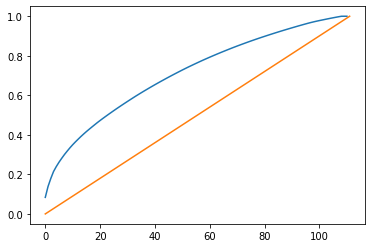

In [50]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot(np.linspace(0, pca.n_components_, 100),np.linspace(0,1,100))
for n, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
#     print(f"{n+1} comps, ratio = {ratio:.2f}")
    pass

~~Looks like about 30 dimensions is required for 95% of the variance.~~
Only true before I scaled, makes sense cus PCA can just hit the large dimensions first ;(  
Will use 30 anyways, cus after that, dimensions add less than if uncorrelated.


Now want to look at the components to see if they align with the hand-picked ones in Freedom Rising. Have checked that components are magnitude 1.

In [51]:
pca = PCA(30)
X_pca = pca.fit_transform(X_scaled)

In [52]:
for n, component in enumerate(pca.components_):
    print(f"Component {n}")
    indices = np.abs(component).argsort()[::-1][:8]
    for i in indices:
        column_name = columns_X[i]
        val = component[i]
        print(f"{column_name}, val {val:.3f}", end = "")
        if column_name in questions.keys():
            question = questions[column_name]
            print(f", {question}", end = "")
        print("")
    print("")

Component 0
Q6, val 0.231, Important in life: Religion
Q164, val -0.228, Importance of God
Q184, val 0.217, Justifiable: Abortion
Q172R, val 0.208, How often to you pray
Q185, val 0.204, Justifiable: Divorce
Q33, val 0.201, Jobs scarce: Men should have more right to a job than women
Q37, val 0.188, Duty towards society to have children
Q171, val 0.180, How often do you attend religious services

Component 1
Q73, val -0.276, Confidence: Parliament
Q71, val -0.265, Confidence: The Government
Q72, val -0.253, Confidence: The Political Parties
Q70, val -0.252, Confidence: Justice System/Courts
Q74, val -0.247, Confidence: The Civil Services
Q69, val -0.223, Confidence: The Police
Q252, val 0.221, Satisfaction with the political system performance
Q251, val 0.210, How democratically is this country being governed today

Component 2
Q94R, val 0.258, Membership: Church or religious organization
Q101R, val 0.257, Membership: Charitable/humanitarian organization
Q99R, val 0.249, Membership: Env

Fuck yeah looks good. Note that Q6 religion is coded backwards, low vals are more religious. And many others.

In [227]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca[:10000,:10])

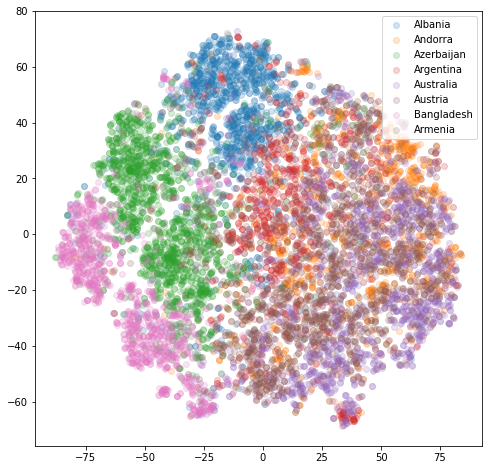

In [233]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

for country in Y[:10000].unique():
    d = X_tsne[Y[:10000] == country]
    ax.scatter(d[:,0],d[:,1], label = alpha_to_name(country), alpha = 0.2)
    
ax.legend()

In [54]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

n_list = []
inertias = []
silhouettes = []

# for n in np.geomspace(1,500, 15, dtype = np.int):
#     print(n)
# #     km = KMeans(n)
#     km = MiniBatchKMeans(n)
#     km.fit(X_pca)
#     n_list.append(n)
#     inertias.append(km.inertia_)

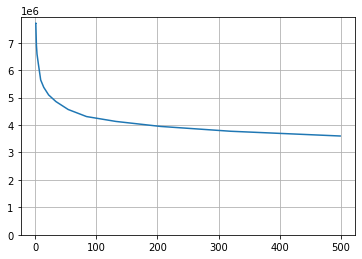

In [255]:
plt.plot(n_list, inertias)
plt.gca().set_ylim(0,None)
plt.grid()

Alright, so looks like there are 50 or so different political opinions.

In [55]:
km = KMeans(n_clusters = 50)
X_km = km.fit_transform(X_pca)

In [265]:
[(c,alpha_to_name(c)) for c in Y.unique()]

[('ALB', 'Albania'),
 ('AND', 'Andorra'),
 ('AZE', 'Azerbaijan'),
 ('ARG', 'Argentina'),
 ('AUS', 'Australia'),
 ('AUT', 'Austria'),
 ('BGD', 'Bangladesh'),
 ('ARM', 'Armenia'),
 ('BOL', 'Bolivia, Plurinational State of'),
 ('BIH', 'Bosnia and Herzegovina'),
 ('BRA', 'Brazil'),
 ('BGR', 'Bulgaria'),
 ('MMR', 'Myanmar'),
 ('BLR', 'Belarus'),
 ('CHL', 'Chile'),
 ('CHN', 'China'),
 ('TWN', 'Taiwan, Province of China'),
 ('COL', 'Colombia'),
 ('HRV', 'Croatia'),
 ('CYP', 'Cyprus'),
 ('CZE', 'Czechia'),
 ('DNK', 'Denmark'),
 ('ECU', 'Ecuador'),
 ('ETH', 'Ethiopia'),
 ('EST', 'Estonia'),
 ('FIN', 'Finland'),
 ('FRA', 'France'),
 ('GEO', 'Georgia'),
 ('DEU', 'Germany'),
 ('GRC', 'Greece'),
 ('GTM', 'Guatemala'),
 ('HKG', 'Hong Kong'),
 ('HUN', 'Hungary'),
 ('ISL', 'Iceland'),
 ('IDN', 'Indonesia'),
 ('IRN', 'Iran, Islamic Republic of'),
 ('IRQ', 'Iraq'),
 ('ITA', 'Italy'),
 ('JPN', 'Japan'),
 ('KAZ', 'Kazakhstan'),
 ('JOR', 'Jordan'),
 ('KOR', 'Korea, Republic of'),
 ('KGZ', 'Kyrgyzstan'),
 (

So now, want to see which clusters a country most belongs to. Then look at what those cluster's properties are. And look at what countries these clusters also house.

In [83]:
def get_sorted_cluster_frequency(country):
    d = np.array(np.unique(km.labels_[Y == country], return_counts = True))
    sort = np.argsort(d[1,:])[::-1]
    return d.T[sort]

def get_cluster_frequency(country):
    d = np.bincount(km.labels_[Y == country], minlength = km.n_clusters)
    return d

In [57]:
def get_cluster_answers(cluster_id):
    c = km.cluster_centers_[cluster_id]
    x = pca.inverse_transform(c)
    return x 
    
def explain_answers(x, N = 10):
    indices = np.abs(x).argsort()[::-1][:N]
    unscaled = scaler.inverse_transform(x)
    for i in indices:
        column_name = columns_X[i]
        val = x[i]
        raw = unscaled[i]
        print(f"{column_name}, val {val:.2f}, raw = {raw:.2f}", end = "")
        if column_name in questions.keys():
            question = questions[column_name]
            print(f", {question}", end = "")
        print("")
    print("")

def get_cluster_countries(cluster_id):
    ids = np.argwhere(km.labels_ == cluster_id).T[0]
    countries = Y[ids]
    d = np.array(np.unique(countries, return_counts = True))
    sort = np.argsort(d[1,:])[::-1]
    return d.T[sort]
    

In [69]:
explain_answers(get_cluster_answers(46))

Q99R, val 1.59, raw = 0.59, Membership: Environmental organization
Q100R, val 1.52, raw = 0.64, Membership: Professional organization
Q101R, val 1.51, raw = 0.67, Membership: Charitable/humanitarian organization
Q102R, val 1.48, raw = 0.48, Membership: Consumer organization
Q96R, val 1.45, raw = 0.70, Membership: Art, music, educational organization
Q103R, val 1.41, raw = 0.51, Membership: Self-help group, mutual aid group
Q98R, val 1.31, raw = 0.50, Membership: Political party
Q97R, val 1.23, raw = 0.58, Membership: Labor union
Q95R, val 1.20, raw = 0.73, Membership: Sport or recreational organization
Q211, val -0.82, raw = 1.73, Political action: attending lawful/peaceful demonstrations



In [67]:
explain_answers(get_cluster_answers(26))

Q289_2.0, val 1.68, raw = 0.61
Q94R, val 0.90, raw = 0.71, Membership: Church or religious organization
Q38, val 0.80, raw = 3.09, It is children duty to take care of ill parent
Q262, val 0.76, raw = 58.79, Age
Q289_0.0, val -0.69, raw = -0.05
Q27, val 0.67, raw = 2.42, One of main goals in life has been to make my parents proud
Q61, val -0.66, raw = 2.41, Trust: People you meet for the first time
Q57, val -0.58, raw = 1.46, Most people can be trusted
Q221, val -0.54, raw = 1.17, Vote in elections: local level
Q177, val -0.52, raw = 1.38, Justifiable: Claiming government benefits to which you are not entitled



In [84]:
get_sorted_cluster_frequency("USA")[:10]

array([[ 26, 296],
       [ 46, 248],
       [ 35, 244],
       [ 39, 164],
       [ 43, 124],
       [ 34, 117],
       [ 10, 105],
       [ 33,  99],
       [  0,  94],
       [ 47,  88]])

In [351]:
get_cluster_countries(8)[:20]

[    87   1269   1300 ... 123747 123897 124578]


array([['CHN', 1840],
       ['VNM', 472],
       ['MAC', 146],
       ['HKG', 136],
       ['RUS', 100],
       ['EST', 73],
       ['KOR', 71],
       ['HUN', 62],
       ['JPN', 61],
       ['CZE', 54],
       ['BLR', 48],
       ['BGR', 34],
       ['DEU', 30],
       ['SVK', 25],
       ['CHE', 19],
       ['GBR', 18],
       ['AZE', 16],
       ['AUT', 15],
       ['FRA', 14],
       ['TWN', 14]], dtype=object)

In [114]:
tsne = TSNE()
centers_tsne = tsne.fit_transform(km.cluster_centers_)

In [120]:
tsne = TSNE()
tsne_fit_data = np.concatenate((km.cluster_centers_, X_pca[::100]))
centers_tsne = tsne.fit_transform(tsne_fit_data)[:km.n_clusters]


In [119]:
# X_lle = lle.transform(X_pca)
# centers_lle = lle.transform(km.cluster_centers_)


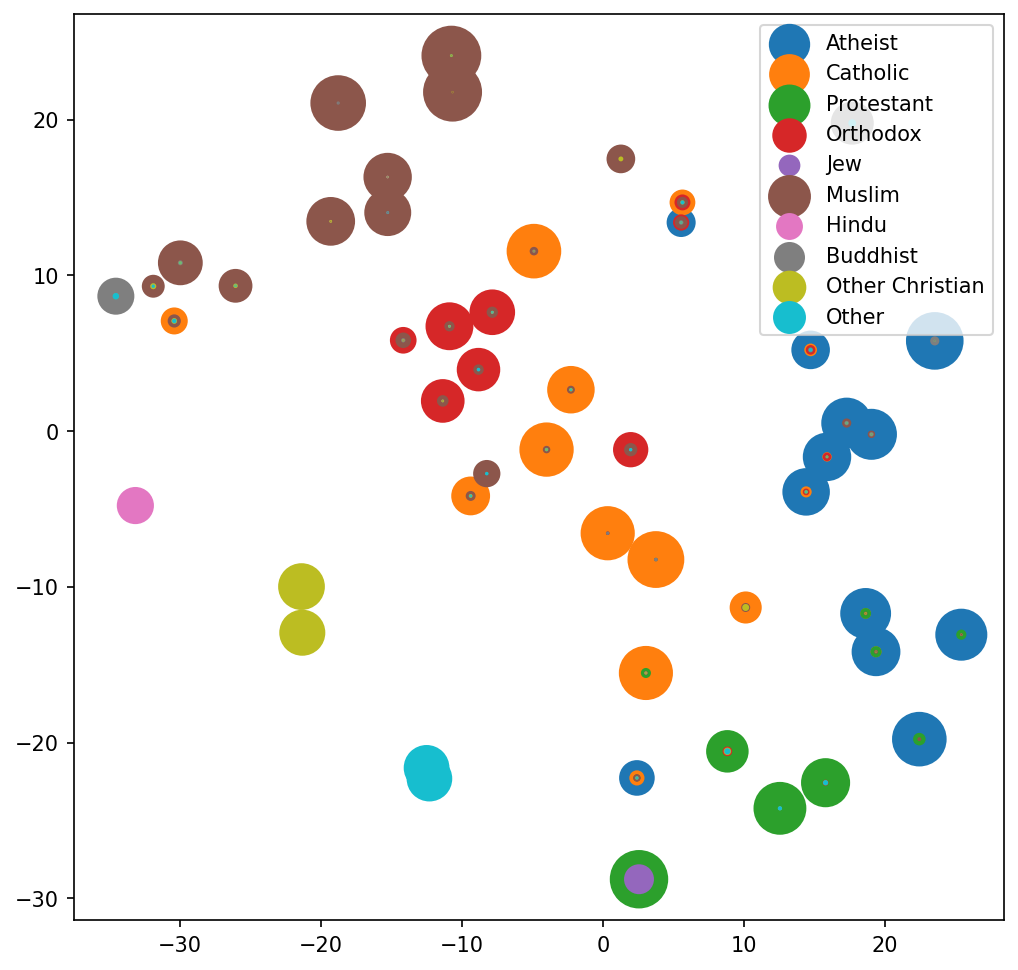

In [123]:
fig = plt.figure(figsize = (8,8), dpi = 150)
ax = fig.add_subplot(111)

# for country in Y.unique():
#     d = X_lle[Y == country]
#     ax.scatter(d[:,0],d[:,1], label = alpha_to_name(country), alpha = 0.2)
    
for center in centers_tsne:
    ax.scatter(center[0], center[1], marker = "x")

cool_countries = ["GBR","USA","CHN","RUS","JPN","PAK"]
# cool_countries = Y.unique()[1::10]

# for country in cool_countries:
#     frequencies = get_cluster_frequency(country) #How many citizens in each cluster
#     plt.scatter(centers_tsne[:,0], centers_tsne[:,1], s = frequencies, label = country)

religion_names_master = ["Atheist","Catholic","Protestant","Orthodox","Jew","Muslim",
                         "Hindu","Buddhist","Other Christian","Other"]
religion_lookup = {f"Q289_{n}.0":name for n, name in enumerate(religion_names_master)}
    
#Plot religions
for r in range(10):
    religion_values = []
    for n, center in enumerate(km.cluster_centers_):
        x = pca.inverse_transform(center)
        x = scaler.inverse_transform(x)
        val = x[-12+r]
        col_name = X.columns[-12+r]
        val = max(0,val)
        religion_values.append(val)
    religion_values = np.array(religion_values)
    label = religion_lookup[col_name]
    plt.scatter(centers_tsne[:,0], centers_tsne[:,1], s = 1000*religion_values**2, label = label)
    
        
    
    
ax.legend()

In [101]:
list(X.columns[-12:-2])

['Q289_0.0',
 'Q289_1.0',
 'Q289_2.0',
 'Q289_3.0',
 'Q289_4.0',
 'Q289_5.0',
 'Q289_6.0',
 'Q289_7.0',
 'Q289_8.0',
 'Q289_9.0']

In [110]:
religion_lookup

{'Q2890.0': 'Atheist', 'Q2891.0': 'Catholic'}